In [3]:
# Import external script
%run models.py

# Import libraries
from sklearn.model_selection import train_test_split as tts

# Import data from CSV
fdata = pd.read_csv('data_histories.csv', index_col="dp_folio")

pm = ProbModel()

In [2]:
# Clusterize between obese and non obese
obesity = {0:[1,2,3], 1:[4,5,6]}
ndata = pm.clusterize_discrete("AIMC", obesity, "obesity", fdata)

# Clusterize excercise features
ejer = {"A":"greatereq_than(2.5)", "B":"less_than(2.5)"}
ndata = pm.clusterize_continuous("ejer_act", ejer, "ejer0B", ndata)
ndata = pm.clusterize_continuous("ejer1", ejer, "ejer1B", ndata)
ndata = pm.clusterize_continuous("ejer5", ejer, "ejer5B", ndata)
ndata = pm.clusterize_continuous("ejer10", ejer, "ejer10B", ndata)
ndata = pm.clusterize_continuous("ejer20", ejer, "ejer20B", ndata)
ndata = pm.clusterize_continuous("ejer30", ejer, "ejer30B", ndata)

ndata = pm.group_list_of_variables(["ejer0B", "ejer1B"], "ejer0_1", ndata)
ndata = pm.group_list_of_variables(["ejer0B", "ejer1B", "ejer5B"], "ejer0_5", ndata)
ndata = pm.group_list_of_variables(["ejer0B", "ejer1B", "ejer5B", "ejer10B"], "ejer0_10", ndata)
ndata = pm.group_list_of_variables(["ejer0B", "ejer1B", "ejer5B", "ejer10B", "ejer20B"], "ejer0_20", ndata)

In [3]:
# Select relevant data
selected_class = "obesity"
filtered_features = ["ejer0B", "ejer1B", "ejer5B", "ejer10B", "ejer20B", "ejer0_1", "ejer0_5", "ejer0_10", "ejer0_20"]
sdata = ndata[filtered_features].join(ndata[selected_class])
sdata = sdata[(sdata.ejer20B != "N") & (sdata.ejer10B != "N") & (sdata.ejer5B != "N") & (sdata.ejer1B != "N") & (sdata.ejer0B != "N")]
sdata

,ejer0B,ejer1B,ejer5B,ejer10B,ejer20B,ejer0_1,ejer0_5,ejer0_10,ejer0_20,obesity
dp_folio,,,,,,,,,,
1,B,B,B,B,B,BB,BBB,BBBB,BBBBB,1
2,B,B,A,A,A,BB,BBA,BBAA,BBAAA,0
4,B,B,A,A,A,BB,BBA,BBAA,BBAAA,1
5,B,B,B,B,B,BB,BBB,BBBB,BBBBB,0
6,A,B,B,B,B,AB,ABB,ABBB,ABBBB,0
...,...,...,...,...,...,...,...,...,...,...
1076,B,B,B,A,A,BB,BBB,BBBA,BBBAA,1
1077,A,A,B,B,B,AA,AAB,AABB,AABBB,0
1078,B,A,A,A,A,BA,BAA,BAAA,BAAAA,0


In [4]:
# Split the data between training and test (2/3 for training and 1/3 for testing)
X = sdata[filtered_features]
Y = sdata[selected_class]
X_train, X_test, Y_train, Y_test = tts(X, Y, test_size=0.333)

print(X_train.shape)
print(X_test.shape)
data_train = X_train.join(Y_train)
data_test = X_test.join(Y_test)
data_train.head()

(626, 9)
(313, 9)


,ejer0B,ejer1B,ejer5B,ejer10B,ejer20B,ejer0_1,ejer0_5,ejer0_10,ejer0_20,obesity
dp_folio,,,,,,,,,,
603,B,B,A,A,A,BB,BBA,BBAA,BBAAA,0
676,B,B,B,A,A,BB,BBB,BBBA,BBBAA,0
471,B,B,A,A,A,BB,BBA,BBAA,BBAAA,0
138,A,A,A,B,B,AA,AAA,AAAB,AAABB,0
118,A,A,A,A,A,AA,AAA,AAAA,AAAAA,0


In [5]:
# Create a classifier object
nb = NB()

In [6]:
queries = {
    "ejer0B": ["A", "B"],
    "ejer1B": ["A", "B"],
    "ejer5B": ["A", "B"],
    "ejer10B": ["A", "B"],
    "ejer20B": ["A", "B"],
    "ejer0_1": np.array(pm.string_generator("", ["A", "B"], 2)).flatten(),
    "ejer0_5": np.array(pm.string_generator("", ["A", "B"], 3)).flatten(),
    "ejer0_10": np.array(pm.string_generator("", ["A", "B"], 4)).flatten(),
    "ejer0_20": np.array(pm.string_generator("", ["A", "B"], 5)).flatten()
}

In [8]:
nb.get_score_full("ejer0_20", "A****", "obesity", 1, sdata)

{'feat': 'ejer0_20',
 'cat': 'A****',
 'class': 'obesity',
 'classcat': 1,
 'score': -0.5821686725978958,
 'nx': 361,
 'ncx': 50,
 'nc': 213}

In [21]:
data_train.shape

(626, 10)

In [31]:
scores_breakdown = nb.get_scores_from_featlist_and_catlist_full(queries, selected_class, 1, data_train)

In [19]:
scores_breakdown

,feat,cat,class,classcat,score,nx,ncx,nc
0,ejer0B,A,obesity,1,-0.689328,238,28,135
1,ejer0B,B,obesity,1,0.335459,388,107,135
2,ejer1B,A,obesity,1,-0.473745,252,36,135
3,ejer1B,B,obesity,1,0.280004,374,99,135
4,ejer5B,A,obesity,1,-0.180672,299,55,135
...,...,...,...,...,...,...,...,...
65,ejer0_20,BBABB,obesity,1,-0.314204,10,1,135
66,ejer0_20,BBBAA,obesity,1,0.602087,49,16,135
67,ejer0_20,BBBAB,obesity,1,0.707448,12,4,135
68,ejer0_20,BBBBA,obesity,1,0.196622,22,5,135


In [32]:
scores_breakdown.to_csv("scores_breakdown_dictionary.csv")

In [23]:
nb_test = NB()
query_histories = [
    "B***A",
    "B*B*A",
    "B**A*",
    "BB*A*",
    "B****",
    "A**A*",
    "AA**A",
    "A*A**",
    "A****",
    "AA***"
]
for history in query_histories:
    print(nb_test.get_score_full("ejer0_20", history, "obesity", 1, data_train))

{'feat': 'ejer0_20', 'cat': 'B***A', 'class': 'obesity', 'classcat': 1, 'score': 0.5119361180500178, 'nx': 167, 'ncx': 52, 'nc': 135}
{'feat': 'ejer0_20', 'cat': 'B*B*A', 'class': 'obesity', 'classcat': 1, 'score': 0.5279792428905935, 'nx': 80, 'ncx': 25, 'nc': 135}
{'feat': 'ejer0_20', 'cat': 'B**A*', 'class': 'obesity', 'classcat': 1, 'score': 0.5050949490570057, 'nx': 171, 'ncx': 53, 'nc': 135}
{'feat': 'ejer0_20', 'cat': 'BB*A*', 'class': 'obesity', 'classcat': 1, 'score': 0.5677981415656832, 'nx': 130, 'ncx': 42, 'nc': 135}
{'feat': 'ejer0_20', 'cat': 'B****', 'class': 'obesity', 'classcat': 1, 'score': 0.33545855179036677, 'nx': 388, 'ncx': 107, 'nc': 135}
{'feat': 'ejer0_20', 'cat': 'A**A*', 'class': 'obesity', 'classcat': 1, 'score': -0.9089106245765325, 'nx': 159, 'ncx': 15, 'nc': 135}
{'feat': 'ejer0_20', 'cat': 'AA**A', 'class': 'obesity', 'classcat': 1, 'score': -1.2080213928519363, 'nx': 117, 'ncx': 8, 'nc': 135}
{'feat': 'ejer0_20', 'cat': 'A*A**', 'class': 'obesity', 'cl

In [35]:
pm.get_nx("ejer0_20", "BBAAA", sdata)

90

In [36]:
pm.get_ncx("ejer0_20", "BBAAA", "obesity", 1, sdata)

26

## Incremental information model comparison

In [24]:
nb1 = NB()
query_features_nb1 = {
    "ejer0B": ["A", "B"]
}
nb1.train(query_features_nb1, "obesity", 1, data_train)
nb1.predict(data_test)

In [25]:
nb2 = NB()
query_features_nb2 = {
    "ejer0_1": np.array(pm.string_generator("", ["A", "B"], 2)).flatten()
}
nb2.train(query_features_nb2, "obesity", 1, data_train)
nb2.predict(data_test)

In [26]:
nb3 = NB()
query_features_nb3 = {
    "ejer0_5": np.array(pm.string_generator("", ["A", "B"], 3)).flatten()
}
nb3.train(query_features_nb3, "obesity", 1, data_train)
nb3.predict(data_test)

In [27]:
nb4 = NB()
query_features_nb4 = {
    "ejer0_10": np.array(pm.string_generator("", ["A", "B"], 4)).flatten()
}
nb4.train(query_features_nb4, "obesity", 1, data_train)
nb4.predict(data_test)

In [28]:
nb5 = NB()
query_features_nb5 = {
    "ejer0_20": np.array(pm.string_generator("", ["A", "B"], 5)).flatten()
}
nb5.train(query_features_nb5, "obesity", 1, data_train)
nb5.predict(data_test)

In [29]:
nba = NB()
query_features_nba = {
    "ejer0B": ["A", "B"],
    "ejer1B": ["A", "B"],
    "ejer5B": ["A", "B"],
    "ejer10B": ["A", "B"],
    "ejer20B": ["A", "B"]    
}
nba.train(query_features_nba, "obesity", 1, data_train)
nba.predict(data_test)

In [30]:
prednb1 = nb1.predicted_scores[["ejer0B"]]
prednba = nba.predicted_scores[["ejer1B", "ejer5B", "ejer10B", "ejer20B"]]
prednb2 = nb2.predicted_scores[["ejer0_1"]]
prednb3 = nb3.predicted_scores[["ejer0_5"]]
prednb4 = nb4.predicted_scores[["ejer0_10"]]
prednb5 = nb5.predicted_scores[["ejer0_20"]]

preds = prednb1.join(prednba).join(prednb2).join(prednb3).join(prednb4).join(prednb5)
data_test.join(preds, rsuffix="_score").to_csv("scores_breakdown_models.csv")

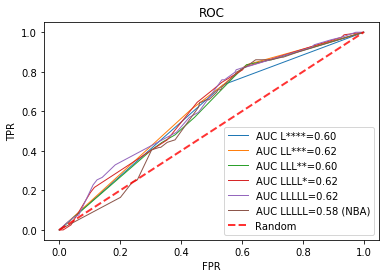

In [84]:
# Predict
Y_prob1 = nb1.get_predicted_scores()
fpr1, tpr1, thresholds = roc_curve(data_test["obesity"].values, Y_prob1.values[:, -1])
roc_auc1 = auc(fpr1, tpr1)

Y_prob2 = nb2.get_predicted_scores()
fpr2, tpr2, thresholds = roc_curve(data_test["obesity"].values, Y_prob2.values[:, -1])
roc_auc2 = auc(fpr2, tpr2)

Y_prob3 = nb3.get_predicted_scores()
fpr3, tpr3, thresholds = roc_curve(data_test["obesity"].values, Y_prob3.values[:, -1])
roc_auc3 = auc(fpr3, tpr3)

Y_prob4 = nb4.get_predicted_scores()
fpr4, tpr4, thresholds = roc_curve(data_test["obesity"].values, Y_prob4.values[:, -1])
roc_auc4 = auc(fpr4, tpr4)

Y_prob5 = nb5.get_predicted_scores()
fpr5, tpr5, thresholds = roc_curve(data_test["obesity"].values, Y_prob5.values[:, -1])
roc_auc5 = auc(fpr5, tpr5)

Y_proba = nba.get_predicted_scores()
fpra, tpra, thresholds = roc_curve(data_test["obesity"].values, Y_proba.values[:, -1])
roc_auca = auc(fpra, tpra)

plt.plot(fpr1, tpr1, lw=1, alpha=1.0, label="AUC L****=%0.2f" % (roc_auc1))
plt.plot(fpr2, tpr2, lw=1, alpha=1.0, label="AUC LL***=%0.2f" % (roc_auc2))
plt.plot(fpr3, tpr3, lw=1, alpha=1.0, label="AUC LLL**=%0.2f" % (roc_auc3))
plt.plot(fpr4, tpr4, lw=1, alpha=1.0, label="AUC LLLL*=%0.2f" % (roc_auc4))
plt.plot(fpr5, tpr5, lw=1, alpha=1.0, label="AUC LLLLL=%0.2f" % (roc_auc5))
plt.plot(fpra, tpra, lw=1, alpha=1.0, label="AUC LLLLL=%0.2f (NBA)" % (roc_auca))

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("ROC")
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Random', alpha=.8)
plt.legend(loc="lower right")
plt.show()

In [204]:
prednb2.groupby(["ejer0_1"]).size()

ejer0_1
-0.844616    103
 0.051933     26
 0.222084     35
 0.325321    149
dtype: int64

### Histograms

<AxesSubplot:>

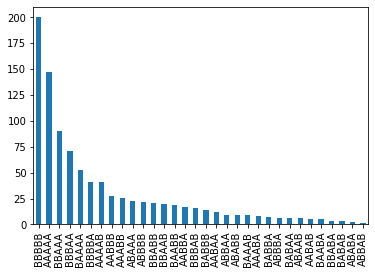

In [13]:
# Histories for the whole 939 individuals population
sdata["ejer0_20"].value_counts().plot(kind="bar", title="Histories distribution")


Text(0.5, 1.0, 'L****')

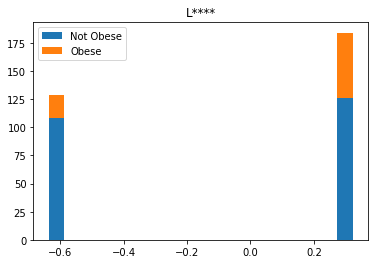

In [213]:
hist1 = prednb1.join(data_test[["obesity", "ejer0B"]], rsuffix="_hs").groupby(["ejer0B", "ejer0B_hs", "obesity"]).size().reset_index(name="counts")
indn = hist1[hist1.obesity == 0]["ejer0B"].values
countsnob = hist1[hist1.obesity == 0]["counts"]
countsob = hist1[hist1.obesity == 1]["counts"]

indn = hist1[hist1.obesity == 0]["ejer0B"].values
countsnob = hist1[hist1.obesity == 0]["counts"]
countsob = hist1[hist1.obesity == 1]["counts"]

p1 = plt.bar(indn, countsnob, width=0.05)
p2 = plt.bar(indn, countsob, width=0.05, bottom=countsnob)
plt.legend((p1[0], p2[0]), ('Not Obese', 'Obese'))
plt.title("L****")

Text(0.5, 1.0, 'LL***')

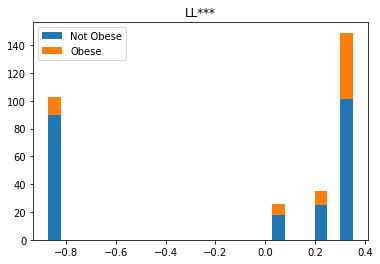

In [215]:
hist2 = prednb2.join(data_test[["obesity", "ejer0_1"]], rsuffix="_hs").groupby(["ejer0_1", "ejer0_1_hs", "obesity"]).size().reset_index(name="counts")
indn = hist2[hist2.obesity == 0]["ejer0_1"].values
countsnob = hist2[hist2.obesity == 0]["counts"]
countsob = hist2[hist2.obesity == 1]["counts"]

indn = hist2[hist2.obesity == 0]["ejer0_1"].values
countsnob = hist2[hist2.obesity == 0]["counts"]
countsob = hist2[hist2.obesity == 1]["counts"]

p1 = plt.bar(indn, countsnob, width=0.05)
p2 = plt.bar(indn, countsob, width=0.05, bottom=countsnob)
plt.legend((p1[0], p2[0]), ('Not Obese', 'Obese'))
plt.title("LL***")

Text(0.5, 1.0, 'LLL**')

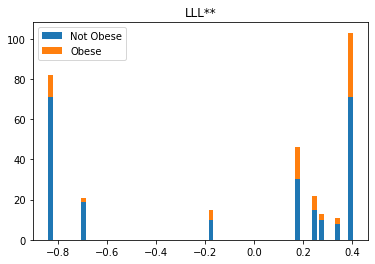

In [222]:
hist3 = prednb3.join(data_test[["obesity", "ejer0_5"]], rsuffix="_hs").groupby(["ejer0_5", "ejer0_5_hs", "obesity"]).size().reset_index(name="counts")
indn = hist3[hist3.obesity == 0]["ejer0_5"].values
countsnob = hist3[hist3.obesity == 0]["counts"]
countsob = hist3[hist3.obesity == 1]["counts"]

indn = hist3[hist3.obesity == 0]["ejer0_5"].values
countsnob = hist3[hist3.obesity == 0]["counts"]
countsob = hist3[hist3.obesity == 1]["counts"]

p1 = plt.bar(indn, countsnob, width=0.02)
p2 = plt.bar(indn, countsob, width=0.02, bottom=countsnob)
plt.legend((p1[0], p2[0]), ('Not Obese', 'Obese'))
plt.title("LLL**")

Text(0.5, 1.0, 'LLLL*')

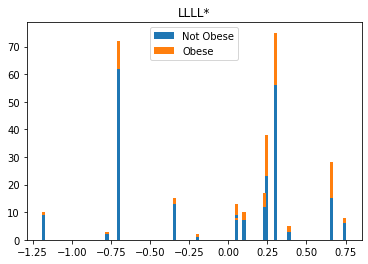

In [242]:
hist4 = prednb4.join(data_test[["obesity", "ejer0_10"]], rsuffix="_hs").groupby(["ejer0_10", "ejer0_10_hs", "obesity"]).size().reset_index(name="counts")
hist4 = hist4.drop(2).drop(29)
indn = hist4[hist4.obesity == 0]["ejer0_10"].values
countsnob = hist4[hist4.obesity == 0]["counts"]
countsob = hist4[hist4.obesity == 1]["counts"]

indn = hist4[hist4.obesity == 0]["ejer0_10"].values
countsnob = hist4[hist4.obesity == 0]["counts"]
countsob = hist4[hist4.obesity == 1]["counts"]

p1 = plt.bar(indn, countsnob, width=0.02)
p2 = plt.bar(indn, countsob, width=0.02, bottom=countsnob)
plt.legend((p1[0], p2[0]), ('Not Obese', 'Obese'))
plt.title("LLLL*")

### Información Incremental

In [1]:
t = [0, 1, 5, 10, 20]
gnb_inc_a = [-0.68933, -1.05614, -1.03766, -1.0164, -0.99618]
nba_inc_a = [-0.68933, -1.16307, -1.34375, -1.38656, -1.38789]

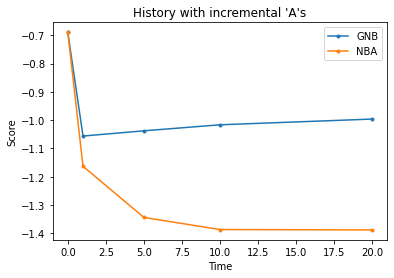

In [10]:
plt.plot(t, gnb_inc_a, marker='.', label="GNB")
plt.plot(t, nba_inc_a, marker=".", label="NBA")

plt.xlabel('Time')
plt.ylabel('Score')
plt.title("Scores trend - Incremental 'A's")
plt.legend(loc="upper right")
plt.show()